#### 9. Obtenga reglas de asociación interesantes del dataset. Recuerde discretizar las variables numéricas. Genere reglas con diferentes niveles de confianza y soporte. Discuta los resultados. Si considera que debe eliminar variables porque son muy frecuentes y con eso puede recibir más insigths de la generación de reglas. Hágalo y discútalo.

In [17]:
columnas = data_cleaned.columns
print("Columnas:")
print(columnas)

tipos_de_datos = data_cleaned.dtypes
print("\nTipos de datos de cada columna:")
print(tipos_de_datos)

Columnas:
Index(['Age', 'Number of sexual partners', 'First sexual intercourse',
       'Num of pregnancies', 'Smokes', 'Smokes (years)', 'Smokes (packs/year)',
       'Hormonal Contraceptives', 'Hormonal Contraceptives (years)', 'IUD',
       'IUD (years)', 'STDs', 'STDs (number)', 'STDs:condylomatosis',
       'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
       'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis',
       'STDs:pelvic inflammatory disease', 'STDs:genital herpes',
       'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
       'STDs:Hepatitis B', 'STDs:HPV', 'STDs: Number of diagnosis',
       'Dx:Cancer', 'Dx:CIN', 'Dx:HPV', 'Dx', 'Hinselmann', 'Schiller',
       'Citology', 'Biopsy'],
      dtype='object')

Tipos de datos de cada columna:
Age                                    int32
Number of sexual partners             object
First sexual intercourse              object
Num of pregnancies                    object
Smokes                      

In [18]:
# Lista de columnas que deben convertirse a tipo numérico
numeric_columns = ['Number of sexual partners', 'First sexual intercourse', 'Num of pregnancies',
                   'Smokes', 'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
                   'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs', 'STDs (number)',
                   'STDs:condylomatosis', 'STDs:cervical condylomatosis', 'STDs:vaginal condylomatosis',
                   'STDs:vulvo-perineal condylomatosis', 'STDs:syphilis', 'STDs:pelvic inflammatory disease',
                   'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS', 'STDs:HIV',
                   'STDs:Hepatitis B', 'STDs:HPV']

# Convertir las columnas a tipo numérico
data_cleaned[numeric_columns] = data_cleaned[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [19]:
# Calcular las frecuencias de cada valor único en cada columna
column_frequencies = {}
for column in data_cleaned.columns:
    column_frequencies[column] = data_cleaned[column].value_counts(normalize=True)

# Mostrar las frecuencias de cada valor único en cada columna
for column, frequencies in column_frequencies.items():
    pass
    #print(f"Columna: {column}")
    #print(frequencies)
    #print("\n")

# Identificar las columnas con valores dominantes o muy frecuentes
frequent_columns = []
for column, frequencies in column_frequencies.items():
    if frequencies.max() >= 0.9:  # Puedes ajustar el umbral según tu criterio
        frequent_columns.append(column)

print("Columnas con valores dominantes o muy frecuentes:")
frequent_columns

Columnas con valores dominantes o muy frecuentes:


['IUD',
 'IUD (years)',
 'STDs',
 'STDs (number)',
 'STDs:condylomatosis',
 'STDs:cervical condylomatosis',
 'STDs:vaginal condylomatosis',
 'STDs:vulvo-perineal condylomatosis',
 'STDs:syphilis',
 'STDs:pelvic inflammatory disease',
 'STDs:genital herpes',
 'STDs:molluscum contagiosum',
 'STDs:AIDS',
 'STDs:HIV',
 'STDs:Hepatitis B',
 'STDs:HPV',
 'STDs: Number of diagnosis',
 'Dx:Cancer',
 'Dx:CIN',
 'Dx:HPV',
 'Dx',
 'Hinselmann',
 'Schiller',
 'Citology',
 'Biopsy']

,Age,STDs: Number of diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
853,3,0,0,0,0,0,0,0,0,0
854,3,0,0,0,0,0,0,0,0,0
855,2,0,0,0,0,0,0,0,0,0
856,3,0,0,0,0,0,0,0,0,0


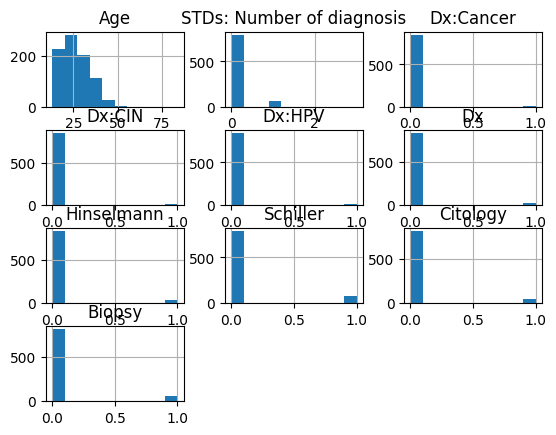

In [20]:
# Obtener la lista de columnas numéricas
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualizar las distribuciones (opcional)
data[numeric_columns].hist()

# Elegir el número de bins (intervalos) para el método de igual frecuencia
num_bins = 5

# Aplicar el método de igual frecuencia a cada columna numérica
for column in numeric_columns:
    data[column] = pd.qcut(data[column], num_bins, labels=False, duplicates='drop')

# Ver los resultados de las columnas discretizadas
data[numeric_columns]

In [21]:
data_numeric = data_cleaned[numeric_columns]

# Discretizar las variables numéricas utilizando KBinsDiscretizer
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_discretized = discretizer.fit_transform(data_numeric)

# Convertir los valores discretos en valores binarios (0 o 1)
data_discretized[data_discretized > 0] = 1

# Convertir el DataFrame discretizado a un nuevo DataFrame con nombres de columnas originales
data_discretized = pd.DataFrame(data_discretized, columns=data_numeric.columns)

# Aplicar el algoritmo Apriori para encontrar conjuntos de ítems frecuentes
frequent_itemsets = apriori(data_discretized, min_support=0.05, use_colnames=True)

# Generar reglas de asociación a partir de los conjuntos de ítems frecuentes
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Imprimir las reglas de asociación
rules


C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_discretization.py:239: FutureWarning: In version 1.5 onwards, subsample=200_000 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Biopsy),(Schiller),0.064103,0.086247,0.055944,0.872727,10.118919,0.050415,7.179487,0.962900
1,(Schiller),(Biopsy),0.086247,0.064103,0.055944,0.648649,10.118919,0.050415,2.663708,0.986235


#### Regla: 
antecedents: (Schiller)
consequents: (Biopsy)
support: 0.055944
confidence: 0.648649
lift: 10.118919
leverage: 0.050415
conviction: 2.663708
zhangs_metric: 0.986235
Esto indica que la variable Schiller representa el 5.59% de las transacciones. La variable Biopsy aparece el 64.86% de las veces que Schiller aparece en la transacción. La probabilidad de que ambas variables ocurran juntas es 10.12 veces mayor que la probabilidad esperada si fueran variables independientes, según el valor de elevación.

#### Regla:
antecedents: (Biopsy)
consequents: (Schiller)
support: 0.055944
confidence: 0.872727
lift: 10.118919
leverage: 0.050415
conviction: 7.179487
zhangs_metric: 0.962900
El antecedente de esta regla es Biopsy, y el consecuente es Schiller. El soporte es del 5.59%, lo que significa que la variable Biopsy representa el 5.59% de las transacciones. La confianza es del 87.27%, lo que significa que la variable Schiller aparece el 87.27% de las veces que Biopsy aparece en la transacción. La probabilidad de que ambas variables ocurran juntas es 10.12 veces mayor que la probabilidad esperada si fueran independientes, según el valor de elevación. Un aumento superior an uno indica una relación positiva entre las variables. La variable Biopsy es 7.18 veces más probable de aparecer en transacciones que no contienen Schiller, según el valor de convicción de 7.18. Un valor mayor a 1 en conviction indica una asociación fuerte entre el antecedente y el consecuente.

In [22]:
# Definir los nuevos valores de soporte mínimo y confianza mínimo
min_support = 0.03
min_confidence = 0.7

# Aplicar el algoritmo Apriori con los nuevos valores de umbral
frequent_itemsets = apriori(data_discretized, min_support=min_support, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

# Imprimir las reglas de asociación con los nuevos umbrales
rules

C:\Users\Gamer\AppData\Roaming\Python\Python310\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Hinselmann),(Schiller),0.040793,0.086247,0.039627,0.971429,11.263320,0.036109,31.981352,0.949968
1,(Biopsy),(Schiller),0.064103,0.086247,0.055944,0.872727,10.118919,0.050415,7.179487,0.962900
2,"(Biopsy, Age)",(Schiller),0.033800,0.086247,0.032634,0.965517,11.194781,0.029719,26.498834,0.942530
3,"(Schiller, Age)",(Biopsy),0.045455,0.064103,0.032634,0.717949,11.200000,0.029720,3.318182,0.954082


#### Nueva regla con otros valores de soporte y confianza:
El antecedente es Hinselmann y el resultado es Schiller. El soporte es del 3.96%, lo que significa que aproximadamente 3.96% de las transacciones contienen la variable Hinselmann. La confianza es del 97.14%, lo que significa que la variable Schiller también aparece el 97.14% de las veces que Hinselmann aparece en una transacción.
La probabilidad de que ambas variables ocurran juntas es 11.26 veces mayor que la probabilidad esperada si fueran independientes, según el valor lift de 11.26. Un ascenso superior an uno indica una relación positiva entre las variables.
La variable Hinselmann es 31.98 veces más probable de aparecer en las transacciones que no contienen Schiller, según el valor de convicción. 